In [73]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
from pearce.emulator.emu import OriginalRecipe, ExtraCrispy
from pearce.emulator.trainingData import parameter, PARAMS

In [75]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from itertools import cycle
colors = cycle(sns.color_palette())

In [76]:
training_dir = '/u/ki/swmclau2/des/PearceLHC_wp_rp'
fiducial_params = {'logM0': 12.20, 'logM1': 13.7, 'alpha': 1.02,
                      'logMmin': 12.1, 'f_c': 0.19, 'sigma_logM': 0.46}
rbins = np.array([  0.06309573,   0.12437607,   0.24517359,   0.34422476, 0.48329302, 0.67854546,\
           0.9526807 , 1.33756775,1.8779508 ,   2.6366509 ,   3.70186906,   5.19743987, 7.29722764, \
           10.24533859,  14.38449888,  20.1958975 , 28.35512583,  39.81071706] )
rpoints = (rbins[1:]+rbins[:-1])/2

In [77]:
y_param = 'logMmin'
emulation_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.533), 
                   ('alpha', 1.083),('logM1', 13.5), ('logMmin', 12.233)]
em_params = dict(emulation_point)
del em_params[y_param]

In [78]:
y_param_idx = -1
for idx, p in enumerate(PARAMS):
    if p.name==y_param:
        y_param_idx = idx
        break
        
y_vals = np.linspace(PARAMS[y_param_idx].low, PARAMS[y_param_idx].high, 4)
em_params[y_param] = y_vals

In [79]:
print em_params[y_param]

[ 11.7         11.96666667  12.23333333  12.5       ]


In [80]:
print len(em_params)

6


In [81]:
emu1 = ExtraCrispy(training_dir)

In [82]:
#rpoints = np.logspace(np.log10(rbins[0]), np.log10(rbins[-1]), 200)
log_xi_pred, log_xi_cov = emu1.emulate_wrt_r(em_params, rpoints)
log_xi_err = np.sqrt(np.diag(log_xi_cov))
log_xi_pred = log_xi_pred.reshape((-1, len(rpoints)))
log_xi_err = log_xi_err.reshape((-1, len(rpoints)))

In [83]:
truth_dir = '/u/ki/swmclau2/des/PearceFHC_wp_rp/'
plot_r, plot_xi, plot_xi_err = emu1.get_plot_data(em_params,truth_dir, independent_variable=None)

(4, 6)


In [84]:
plot_xi.shape, plot_r.shape, plot_xi_err.shape

((4, 17), (4, 17), (4, 17))

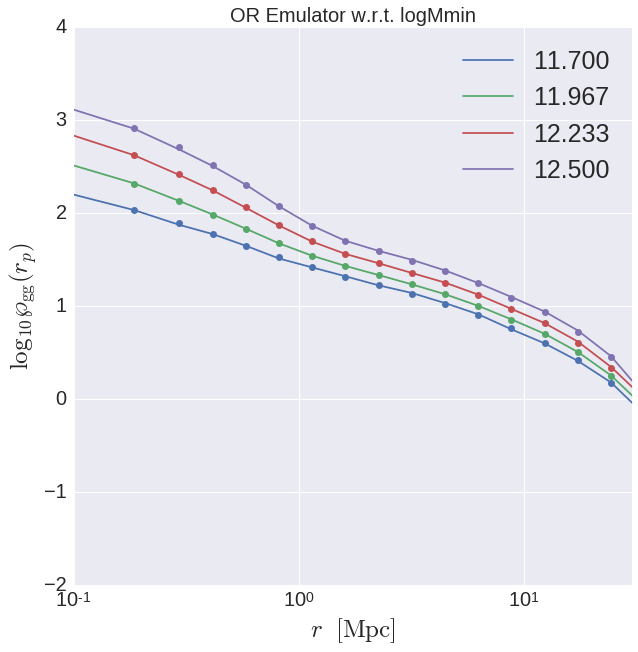

In [85]:
fig = plt.figure(figsize = (10, 10))
for label, lxp, lxe,pr, px, err,c in zip(y_vals, log_xi_pred, log_xi_err ,plot_r, plot_xi,plot_xi_err,colors):

    plt.plot(rpoints, lxp,label = '%.3f'%label, color = c )

    plt.fill_between(rpoints,lxp+lxe,
                     lxp-lxe, color = c, alpha = 0.3)

    plt.errorbar(10**pr, px,err, color =c,fmt = 'o')

plt.xlim(xmin = 0.1, xmax = 30)    
plt.ylim(ymin = -2, ymax = 4)
plt.title("OR Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\log_{10}{\wp_{\rm gg}(r_p) }$', fontsize=25)
plt.legend(loc='best', fontsize=25)

In [86]:
#em_params[y_param] = em_params[y_param][1]
#rpoints = rpoints[:2]

In [87]:
log_xi_pred_jk, log_xi_cov_jk = emu1.emulate_wrt_r(em_params, rpoints, jackknife_errors=True)

In [88]:
log_xi_err_jk = np.sqrt(np.diag(log_xi_cov_jk))
log_xi_pred_jk = log_xi_pred_jk.reshape((-1, len(rpoints)))
log_xi_err_jk = log_xi_err_jk.reshape((-1, len(rpoints)))

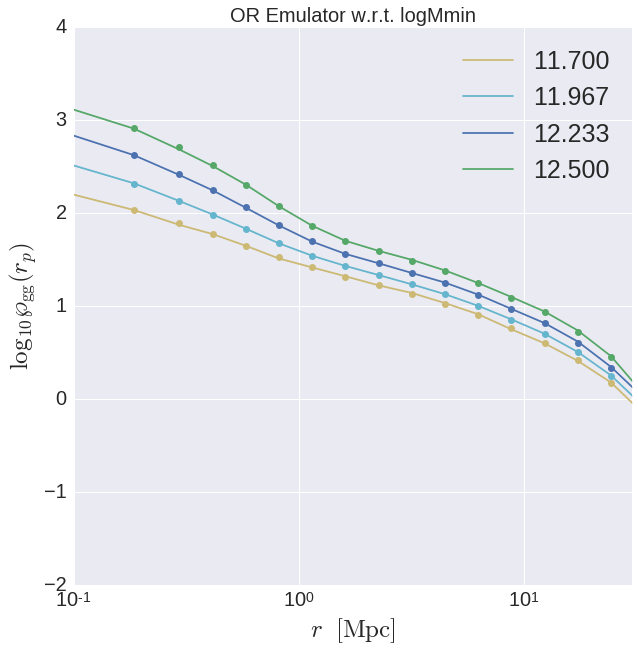

In [89]:
fig = plt.figure(figsize = (10, 10))
for label, lxp, lxe,pr, px, err,c in zip(y_vals, log_xi_pred_jk, log_xi_err_jk ,plot_r, plot_xi,plot_xi_err,colors):

    plt.plot(rpoints, lxp,label = '%.3f'%label, color = c )

    plt.fill_between(rpoints,lxp+lxe,
                     lxp-lxe, color = c, alpha = 0.3)

    plt.errorbar(10**pr, px,err, color =c,fmt = 'o')

plt.xlim(xmin = 0.1, xmax = 30)    
plt.ylim(ymin = -2, ymax = 4)
plt.title("OR Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\log_{10}{\wp_{\rm gg}(r_p) }$', fontsize=25)
plt.legend(loc='best', fontsize=25)

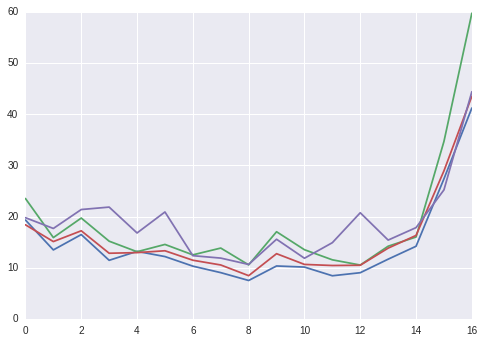

In [93]:
for err, jk_err in zip(log_xi_err, log_xi_err_jk):
    plt.plot(jk_err/err);

In [136]:
(log_xi_pred-plot_xi)/plot_xi

array([[  6.09421219e-03,   2.79692405e-03,  -6.38795465e-04,
          1.45781022e-03,  -3.29531577e-04,  -1.25234958e-03,
         -9.35988473e-04,  -2.29152089e-04,  -9.41173676e-04,
          3.45627847e-03,   2.01354036e-03,  -2.45392265e-03,
          3.46534978e-03,   7.49970533e-04,   1.25112834e-02,
          3.77317422e-03,  -3.99312241e-02],
       [  1.73597372e-03,   1.74827419e-03,   1.14727788e-03,
          4.24842959e-03,   4.13420373e-03,   6.30035758e-03,
          4.57571566e-03,   4.23729688e-03,   7.70489729e-04,
          4.30007821e-03,   4.09824022e-03,   2.06021937e-03,
          4.68950398e-03,   6.03789600e-03,   8.74310727e-03,
          2.40584529e-02,   8.84484700e-02],
       [  2.09633653e-04,  -1.51399080e-03,  -2.20723480e-03,
         -4.25803917e-03,  -3.55045192e-03,  -1.77932629e-03,
          1.01788904e-03,  -2.93237725e-04,  -5.63842823e-03,
          1.47932554e-03,  -8.64527613e-05,  -2.14563603e-03,
          1.39544475e-03,  -6.20752088e-03

In [ ]:
rpoints

array([  0.0937359 ,   0.18477483,   0.29469917,   0.41375889,
         0.58091924,   0.81561308,   1.14512422,   1.60775928,
         2.25730085,   3.16925998,   4.44965447,   6.24733375,
         8.77128311,  12.31491873,  17.29019819,  24.27551166,  34.08292144])

In [ ]:
abs_err = emu1.goodness_of_fit(truth_dir,2000, 'abs')

In [ ]:
rel_err = emu1.goodness_of_fit(truth_dir,2000, 'rel')

In [ ]:
abs_err.shape,rel_err.shape

In [ ]:
colors = sns.color_palette()

In [ ]:
fig = plt.figure(figsize = (20, 10))
plt.subplot(121)
for abe in abs_err:
    plt.plot(10**plot_r[0,:], abe, color = colors[0], alpha = 0.3)
plt.plot(10**plot_r[0,:], np.mean(abs_err, axis=0), color=colors[2])
plt.xlim(xmin = 0.1, xmax = 30)    
plt.ylim(ymin = -.1, ymax = .1)
plt.title("Abs err wprp", fontsize =20)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\log_{10}{wp_{\rm gg}(r_p) }$', fontsize=25)

plt.subplot(122)
for ree in rel_err:
    plt.plot(10**plot_r[0,:], ree,color = colors[0], alpha = 0.3)
plt.plot(10**plot_r[0,:], np.mean(rel_err, axis=0), color=colors[2])
plt.xlim(xmin = 0.1, xmax = 30)
plt.ylim(ymin = -.05, ymax = 0.05)
plt.title("Rel err wprp", fontsize =20)
plt.xscale('log')
#plt.loglog()
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)

plt.show()

In [ ]:
r2 = emu1.goodness_of_fit(truth_dir,2000, 'r2')
r2.mean()